# Log returns plots

In [76]:
import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [77]:
short_window = 21
long_window = 84

currencies = ["BTC", "ETH", "ALGO", "STORJ", "MANA"]
data = {}

for currency in currencies:
    with open(f"data/Kraken_{currency}USD.pkl", "rb") as file:
        data[currency] = pkl.load(file)

In [78]:
def plot_signal(log_returns):
    signal = log_returns["log_returns"].rolling(window=short_window).mean() - log_returns["log_returns"].rolling(window=long_window).mean()
    signal = signal[long_window:]
    plt.plot(log_returns["log_returns"].rolling(window=short_window).mean()[long_window:])
    plt.plot(log_returns["log_returns"].rolling(window=long_window).mean())
    signal[signal<=0] = 0
    return signal

In [79]:
def calc_performance(signal, returns):
    returns = returns[long_window:]
    daily_returns = returns*np.sign(signal)+1
    return daily_returns.cumprod()

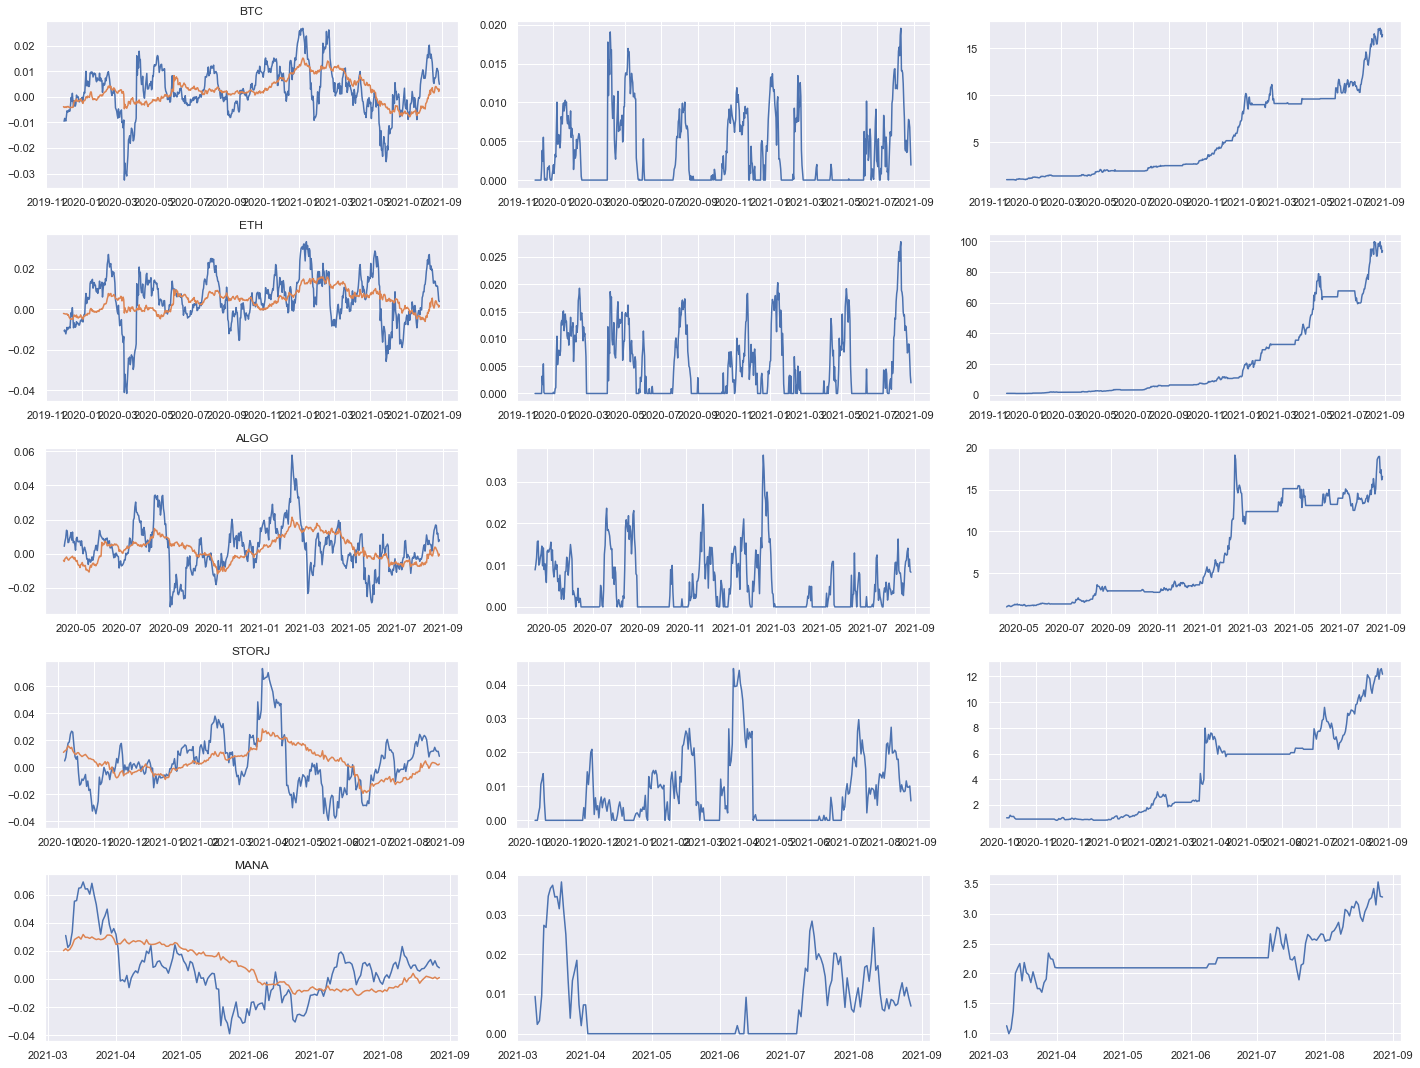

In [89]:
f = plt.figure(figsize=(20, len(data)*3))
gs = f.add_gridspec(len(data), 3)

for idx, currency in enumerate(data):
    ax = f.add_subplot(gs[idx, 0])
    ax.set_title(currency)
    signal = plot_signal(data[currency])

    ax = f.add_subplot(gs[idx, 1])
    plt.plot(signal)

    ax = f.add_subplot(gs[idx, 2])
    plt.plot(calc_performance(signal, data[currency]["close"].pct_change()))

f.tight_layout()
plt.show()